In [74]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [75]:
tesla = yf.Ticker("TSLA")

In [76]:
tesla_data = tesla.history(period="max")

In [77]:
tesla_data.reset_index(inplace=True)

In [78]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [79]:
url_tesla="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [80]:
read_html_pandas_data = pd.read_html(url_tesla)
tesla_revenue = read_html_pandas_data[1]

In [81]:
tesla_revenue["Tesla Quarterly Revenue(Millions of US $).1"] = tesla_revenue["Tesla Quarterly Revenue(Millions of US $).1"].str.replace(',|\$',"")

In [82]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Tesla Quarterly Revenue(Millions of US $).1"] != ""]

In [83]:
tesla_revenue.tail()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [84]:
gme = yf.Ticker("GME")

In [85]:
gme_data = gme.history(period="max")

In [86]:
gme_data.reset_index(inplace=True)

In [87]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [88]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [89]:
read_html_pandas_data = pd.read_html(url_gme)
gme_revenue = read_html_pandas_data[1]

In [90]:
gme_revenue["GameStop Quarterly Revenue(Millions of US $).1"] = gme_revenue["GameStop Quarterly Revenue(Millions of US $).1"].str.replace(',|\$',"")

In [91]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["GameStop Quarterly Revenue(Millions of US $).1"] != ""]

In [92]:
gme_revenue.tail()

,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [102]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [106]:
tesla_revenue.rename(columns = {"Tesla Quarterly Revenue(Millions of US $)":'Date'}, inplace = True) 
tesla_revenue.rename(columns = {"Tesla Quarterly Revenue(Millions of US $).1":'Revenue'}, inplace = True) 

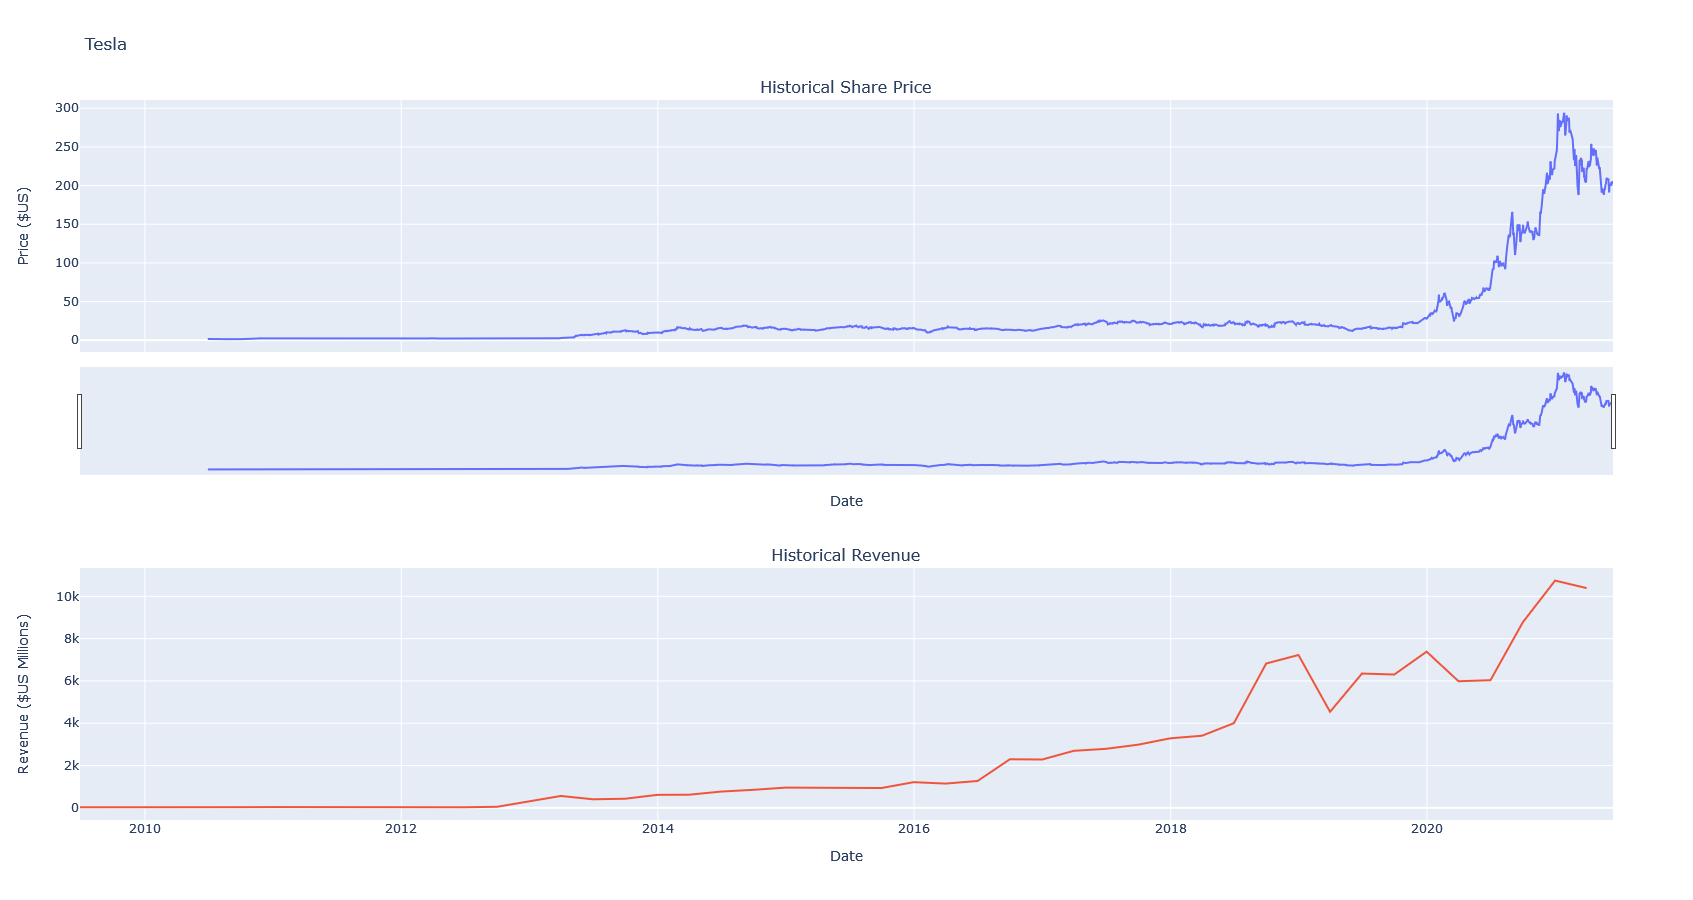

In [112]:
make_graph(tesla_data, tesla_revenue, "Tesla")

In [109]:
gme_revenue.rename(columns = {"GameStop Quarterly Revenue(Millions of US $)":'Date'}, inplace = True) 
gme_revenue.rename(columns = {"GameStop Quarterly Revenue(Millions of US $).1":'Revenue'}, inplace = True) 

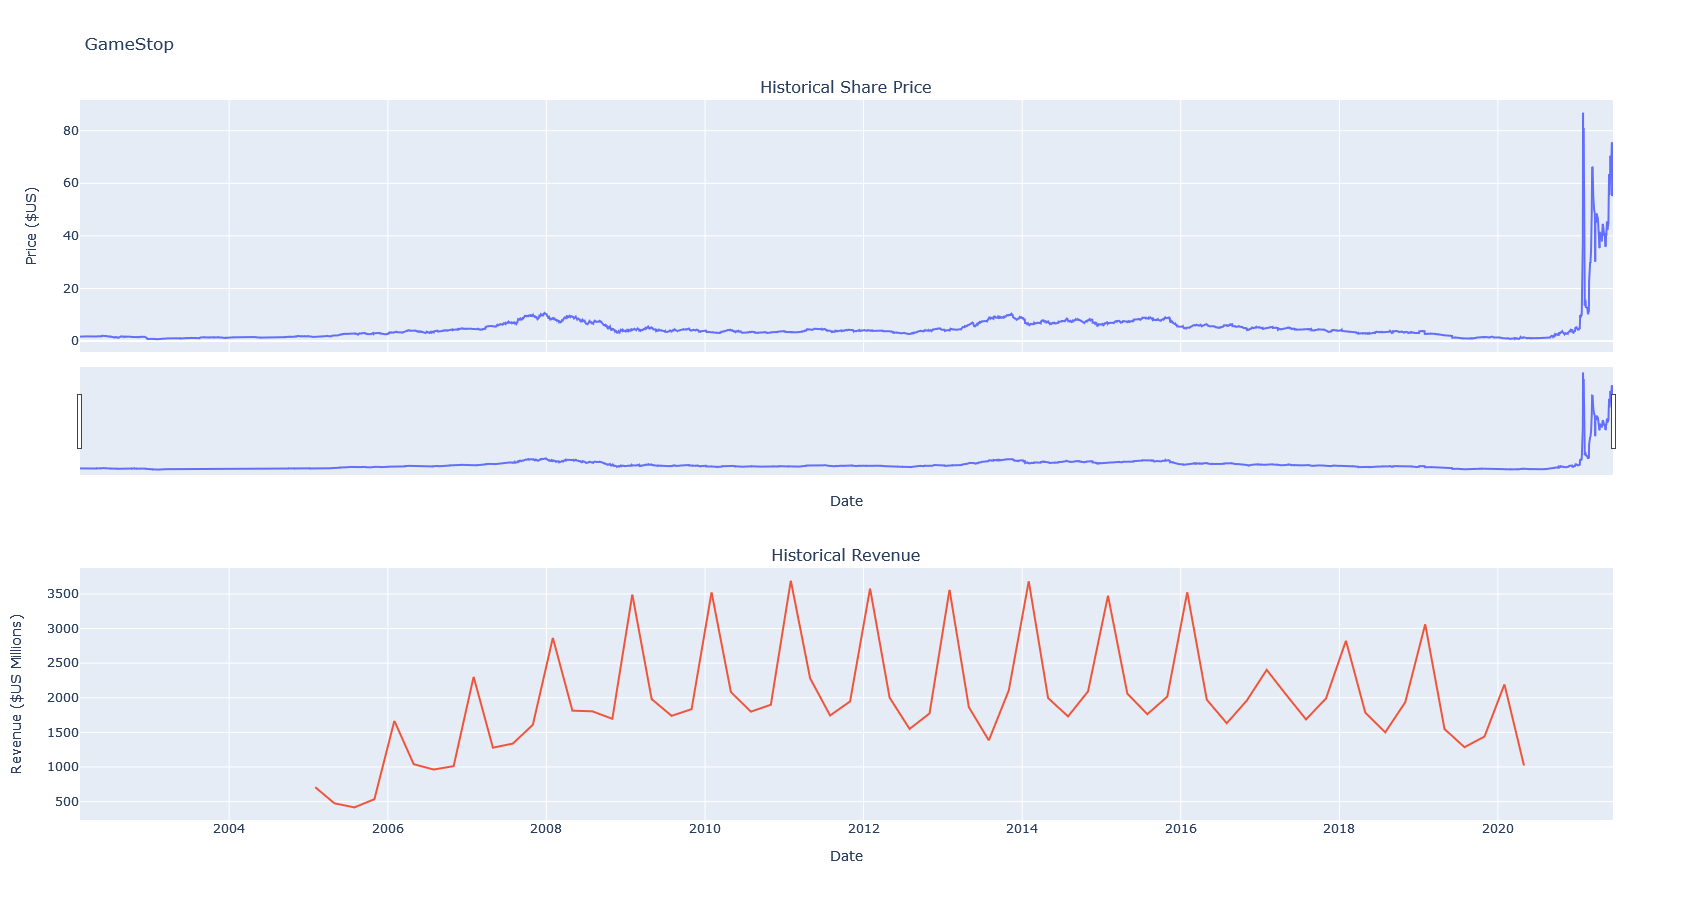

In [111]:
make_graph(gme_data, gme_revenue, "GameStop")